In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("D:/Rama Research Drive/Rama Data Sets/Data sets/heart_cleveland_upload.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
df1=df.copy()

In [5]:
df1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [6]:
pd.options.mode.chained_assignment = None
df1['sex'][df1['sex'] == 0] = 'Female'
df1['sex'][df1['sex'] == 1] = 'Male' 

df1['chest_pain_type'][df1['chest_pain_type'] == 0] = 'Typical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 1] = 'Atypical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 2] = 'Non-anginal pain'
df1['chest_pain_type'][df1['chest_pain_type'] == 3] = 'Asymptomatic'

df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 0] = 'Lower than 120mg/ml'
df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 1] = 'Greater than 120mg/ml'

df1['rest_ecg'][df1['rest_ecg'] == 0] = 'Normal'
df1['rest_ecg'][df1['rest_ecg'] == 1] = 'ST-T wave abnormality'
df1['rest_ecg'][df1['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 0] = 'No'
df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 1] = 'Yes'

df1['st_slope'][df1['st_slope'] == 0] = 'Upsloping'
df1['st_slope'][df1['st_slope'] == 1] = 'Flat'
df1['st_slope'][df1['st_slope'] == 2] = 'Downsloping'

df1['thalassemia'][df1['thalassemia'] == 0] = 'Normal'
df1['thalassemia'][df1['thalassemia'] == 1] = 'Fixed defect'
df1['thalassemia'][df1['thalassemia'] == 2] = 'Reversable defect'

df1['condition'][df1['condition'] == 0] = 'No'
df1['condition'][df1['condition'] == 1] = 'Yes'


In [7]:
df1.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,Male,Typical angina,160,234,Greater than 120mg/ml,Left ventricular hypertrophy,131,No,0.1,Flat,1,Normal,No
1,69,Female,Typical angina,140,239,Lower than 120mg/ml,Normal,151,No,1.8,Upsloping,2,Normal,No
2,66,Female,Typical angina,150,226,Lower than 120mg/ml,Normal,114,No,2.6,Downsloping,0,Normal,No
3,65,Male,Typical angina,138,282,Greater than 120mg/ml,Left ventricular hypertrophy,174,No,1.4,Flat,1,Normal,Yes
4,64,Male,Typical angina,110,211,Lower than 120mg/ml,Left ventricular hypertrophy,144,Yes,1.8,Flat,0,Normal,No
5,64,Male,Typical angina,170,227,Lower than 120mg/ml,Left ventricular hypertrophy,155,No,0.6,Flat,0,Reversable defect,No
6,63,Male,Typical angina,145,233,Greater than 120mg/ml,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed defect,No
7,61,Male,Typical angina,134,234,Lower than 120mg/ml,Normal,145,No,2.6,Flat,2,Normal,Yes
8,60,Female,Typical angina,150,240,Lower than 120mg/ml,Normal,171,No,0.9,Upsloping,0,Normal,No
9,59,Male,Typical angina,178,270,Lower than 120mg/ml,Left ventricular hypertrophy,145,No,4.2,Downsloping,0,Reversable defect,No


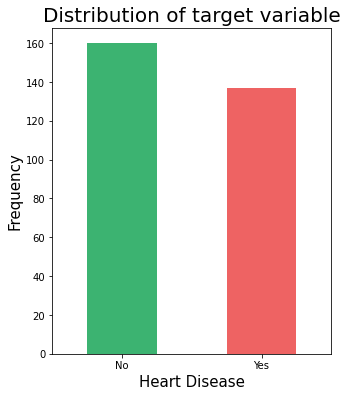

In [8]:
df1.condition.value_counts().plot(kind="bar",figsize=(5,6),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=20)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=0)
plt.show()


In [9]:
countNoDisease = len(df1[df1.condition == "No"])
countHaveDisease = len(df1[df1.condition == "Yes"])
print("Percentage of Patients do not have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.condition)) * 100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.condition)) * 100)))

Percentage of Patients do not have Heart Disease: 53.87%
Percentage of Patients have Heart Disease: 46.13%


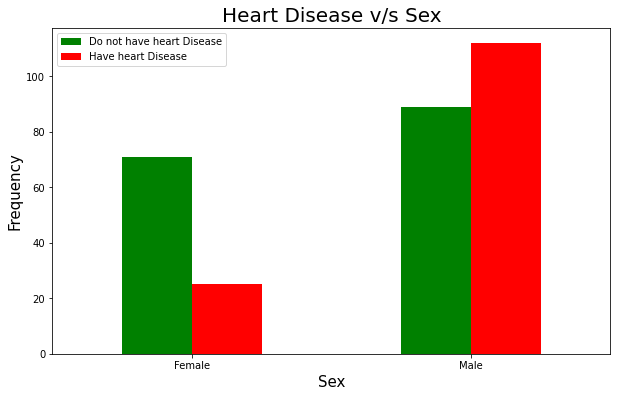

In [27]:
pd.crosstab(df1.sex,df1.condition).plot(kind="bar",figsize=(10,6),color=['green','red'])
plt.title('Heart Disease v/s Sex',fontsize=20)
plt.xlabel('Sex',fontsize=15)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=15)
plt.show()

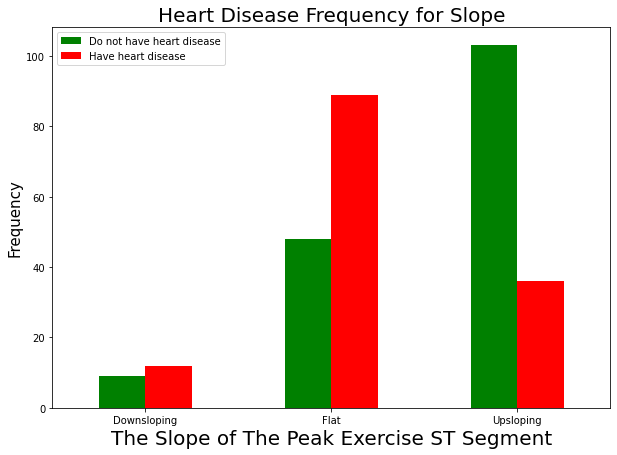

In [26]:
pd.crosstab(df1.st_slope, df1.condition).plot(kind="bar", figsize=(10, 7), color=["green", "red"], ax=plt.gca())
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope",fontsize=20)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=20)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Downsloping","Flat","Upsloping"])
plt.ylabel("Frequency",fontsize=15)
plt.show()


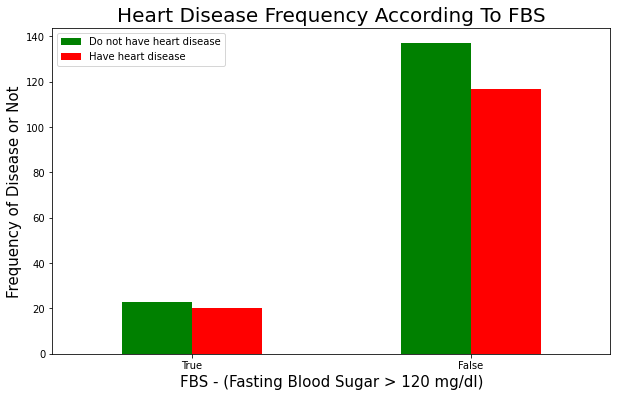

In [29]:
pd.crosstab(df1.fasting_blood_sugar, df1.condition).plot(kind="bar", figsize=(10, 6), color=["green", "red"], ax=plt.gca())
plt.title("Heart Disease Frequency According To FBS",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=15)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=15)
plt.show()

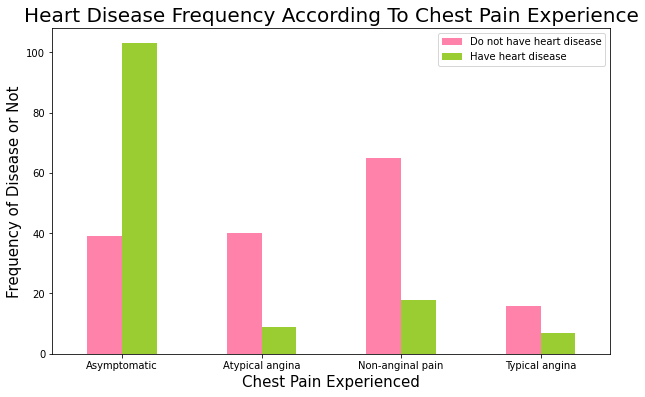

In [30]:
pd.crosstab(df1.chest_pain_type, df1.condition).plot(kind="bar", figsize=(10, 6), color=["#FF82AB", "#9ACD32"], ax=plt.gca())
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=15)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=15)
plt.show()

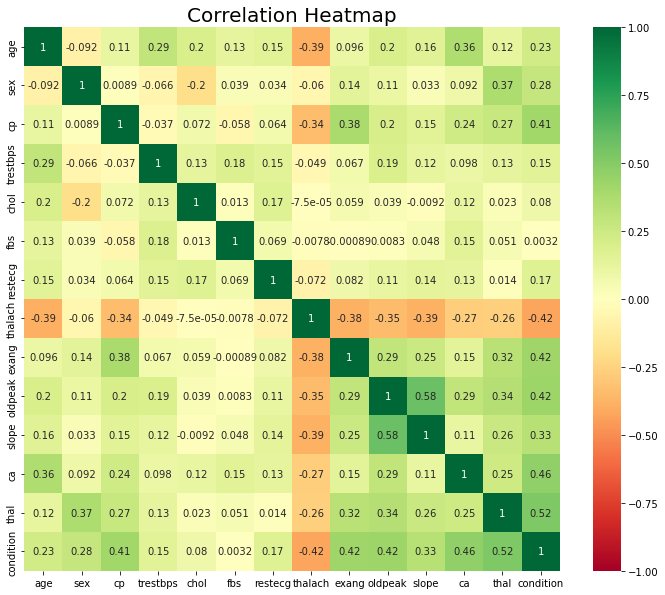

In [31]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdYlGn")
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

In [32]:
### Creating Dummy Variables using One Hot Encoding
a = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
b = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
c = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
d = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
e = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)

In [33]:
frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69,1,0,160,234,1,2,131,0,0.1,...,0,0,0,1,0,1,0,0,0,1
1,69,0,0,140,239,0,0,151,0,1.8,...,0,0,0,0,0,0,1,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,...,0,0,0,0,1,0,0,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,...,0,0,0,1,0,1,0,0,0,1
4,64,1,0,110,211,0,2,144,1,1.8,...,0,0,0,1,0,0,0,0,0,1


In [34]:
df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69,1,160,234,1,131,0,0.1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,69,0,140,239,0,151,0,1.8,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,0,150,226,0,114,0,2.6,0,0,...,0,0,0,0,1,0,0,0,0,0
3,65,1,138,282,1,174,0,1.4,1,0,...,0,0,0,1,0,1,0,0,0,1
4,64,1,110,211,0,144,1,1.8,0,0,...,0,0,0,1,0,0,0,0,0,1


In [35]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [36]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,1.600302,1,1.596266,-0.257179,1,-0.812095,0,-0.820813,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1.600302,0,0.468418,-0.160859,0,0.061157,0,0.639470,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.268242,0,1.032342,-0.411292,0,-1.554358,0,1.326662,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.157555,1,0.355633,0.667499,1,1.065396,0,0.295874,1,0,...,0,0,0,1,0,1,0,0,0,1
4,1.046868,1,-1.223355,-0.700254,0,-0.244481,1,0.639470,0,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
y = df.condition.values
x = df.drop(["condition"], axis=1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [39]:
print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 4740
X_test- 1200
y_train- 237
y_test- 60


In [40]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)

acc = lr.score(x_test, y_test) * 100

accuracies["Logistic Regression"] = acc
print("Logistic Regression Test Accuracy is {:.2f}%".format(acc))

Logistic Regression Test Accuracy is 86.67%


In [41]:
knn = KNeighborsClassifier(n_neighbors=2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} - NN Score: {:.2f}%".format(2, knn.score(x_test, y_test) * 100))

2 - NN Score: 75.00%


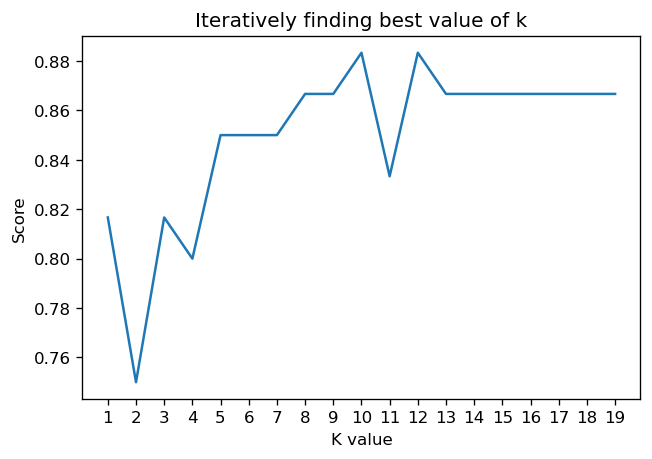

Maximum KNN Test Accuracy is 88.33%


In [42]:
# try to find best k value
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))

plt.figure(dpi=120)
plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Test Accuracy is {:.2f}%".format(acc))

In [43]:
svm = SVC()
svm.fit(x_train, y_train)

acc = svm.score(x_test, y_test) * 100
accuracies["SVM"] = acc
print("SVM Algorithm Test Accuracy is {:.2f}%".format(acc))

SVM Algorithm Test Accuracy is 83.33%


In [44]:
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test, y_test) * 100
accuracies["Naive Bayes"] = acc
print("Naïve Bayes Test Accuracy is {:.2f}%".format(acc))

Naïve Bayes Test Accuracy is 86.67%


In [45]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 81.67%


In [46]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

acc = rf.score(x_test, y_test) * 100
accuracies["Random Forest"] = acc
print("Random Forest Algorithm Test Accuracy is {:.2f}%".format(acc))

Random Forest Algorithm Test Accuracy is 80.00%


<Figure size 720x480 with 0 Axes>

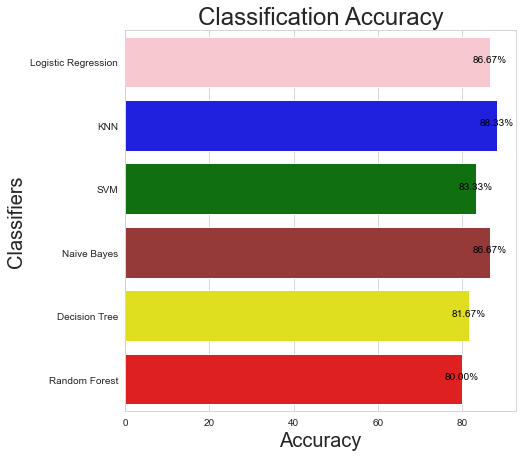

In [77]:
colors = ["pink", "blue", "green", "brown", "yellow", "red"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.title("Classification Accuracy", fontsize = 24)
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Classifiers",fontsize=20)
plt.xlabel("Accuracy",fontsize=20)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()

In [49]:
# Predicted values
y_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_knn = knn3.predict(x_test)
y_svm = svm.predict(x_test)
y_nb = nb.predict(x_test)
y_dtc = dtc.predict(x_test)
y_rf = rf.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_lr)
cm_knn = confusion_matrix(y_test, y_knn)
cm_svm = confusion_matrix(y_test, y_svm)
cm_nb = confusion_matrix(y_test, y_nb)
cm_dtc = confusion_matrix(y_test, y_dtc)
cm_rf = confusion_matrix(y_test, y_rf)

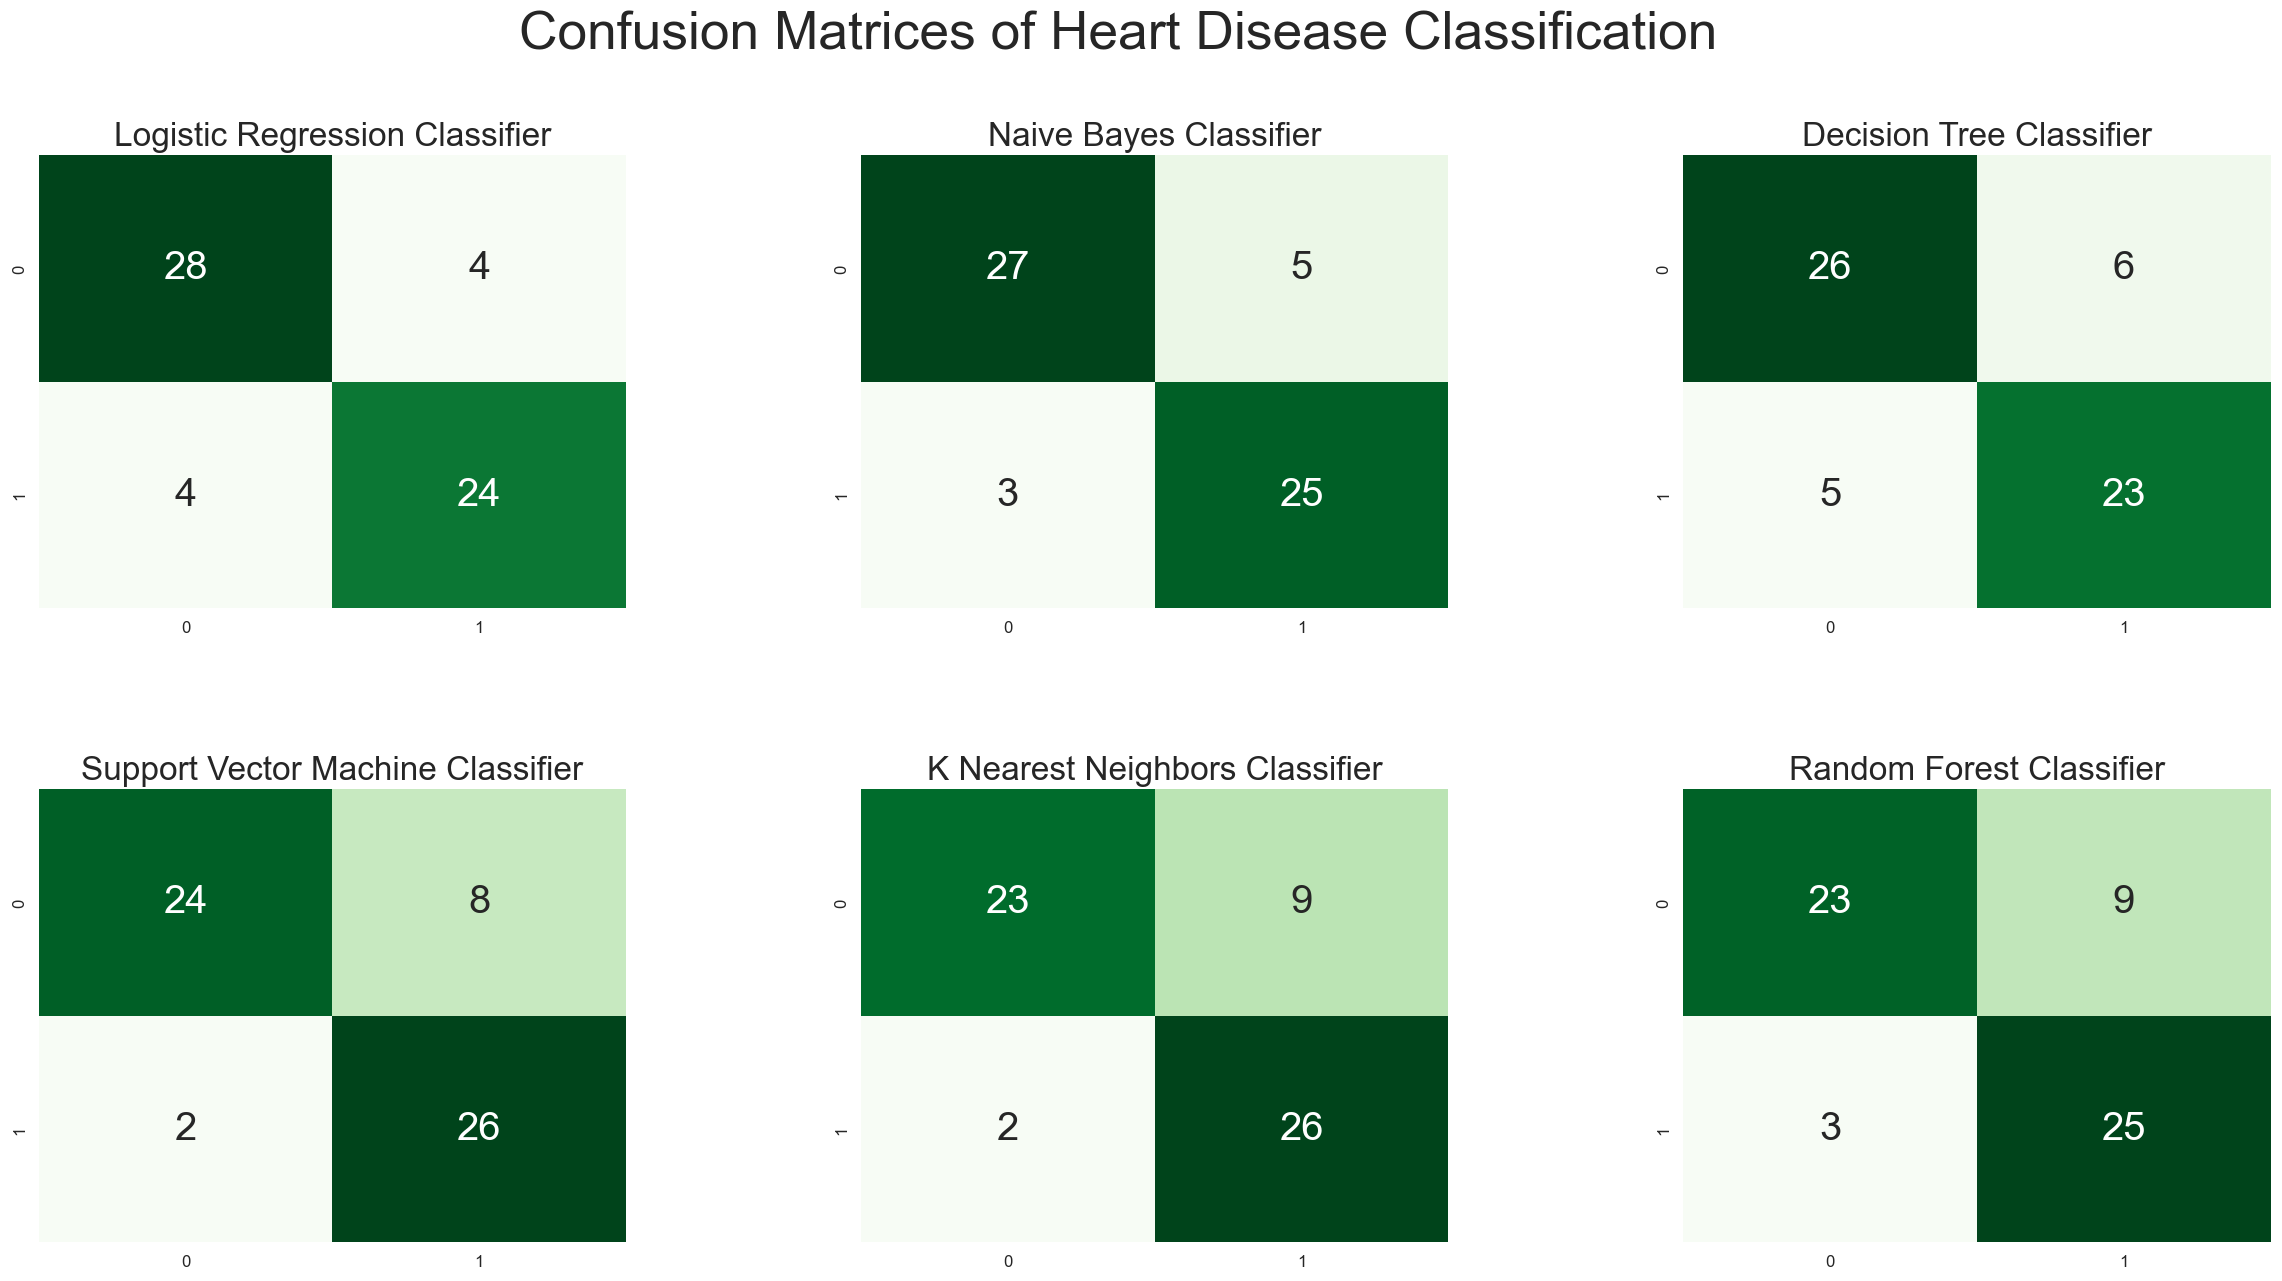

In [64]:
plt.figure(figsize=(24, 12), dpi=120)

plt.suptitle("Confusion Matrices of Heart Disease Classification", fontsize=32)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression Classifier",fontsize=20)
sns.heatmap(
    cm_lr, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 2)
plt.title("Naive Bayes Classifier",fontsize=20)
sns.heatmap(
    cm_nb, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 3)
plt.title("Decision Tree Classifier",fontsize=20)
sns.heatmap(
    cm_dtc, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 4)
plt.title("Support Vector Machine Classifier",fontsize=20)
sns.heatmap(
    cm_svm, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 5)
plt.title("K Nearest Neighbors Classifier",fontsize=20)
sns.heatmap(
    cm_knn, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24}
)


plt.subplot(2, 3, 6)
plt.title("Random Forest Classifier",fontsize=20)
sns.heatmap(
    cm_rf, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()